# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/'


# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
params = {"units": "metric"}

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url,params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | miramichi
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | shingu
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | kosh-agach
Processing Record 17 of Set 1 | fort bragg
Processing Record 18 of Set 1 | pechora
Processing Record 19 of Set 1 | tromso
Processing Record 20 of Set 1 | vilyuysk
Processing Record 21 of Set 1 | san antonio del estrecho
City not found. Skipping...
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,miramichi,47.0043,-65.4654,7.93,77,100,2.95,CA,1712874307
1,port mathurin,-19.6833,63.4167,26.71,77,4,5.04,MU,1712873837
2,waitangi,-43.9535,-176.5597,17.68,93,100,4.47,NZ,1712873896
3,puerto ayora,-0.7393,-90.3518,28.98,97,48,4.47,EC,1712874310
4,bethel,41.3712,-73.4140,15.27,88,100,1.54,US,1712874185


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,miramichi,47.0043,-65.4654,7.93,77,100,2.95,CA,1712874307
1,port mathurin,-19.6833,63.4167,26.71,77,4,5.04,MU,1712873837
2,waitangi,-43.9535,-176.5597,17.68,93,100,4.47,NZ,1712873896
3,puerto ayora,-0.7393,-90.3518,28.98,97,48,4.47,EC,1712874310
4,bethel,41.3712,-73.4140,15.27,88,100,1.54,US,1712874185


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

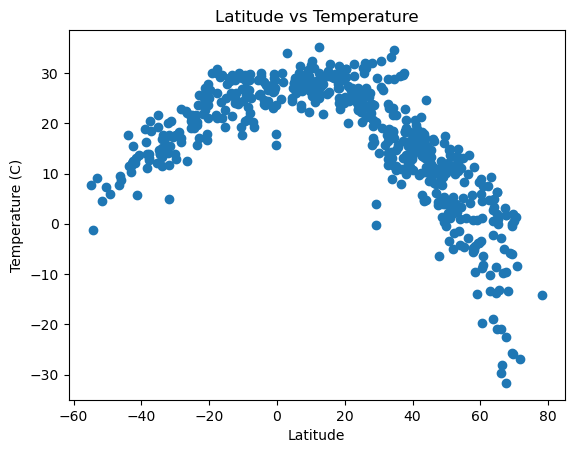

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])


# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

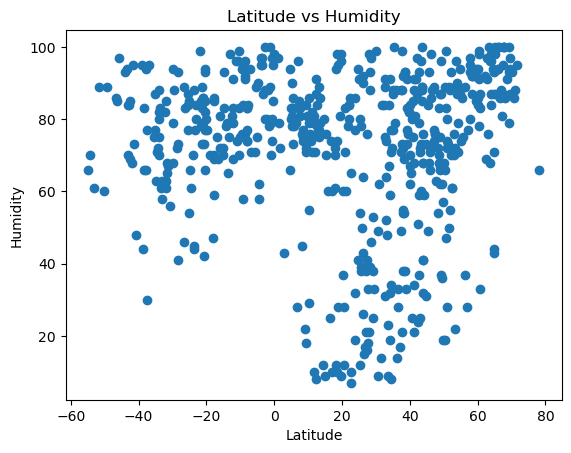

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

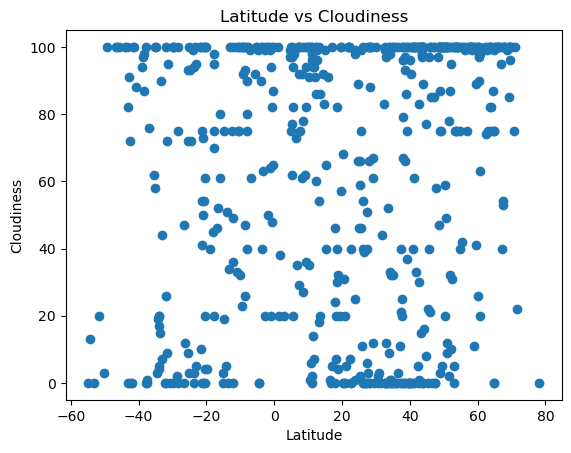

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

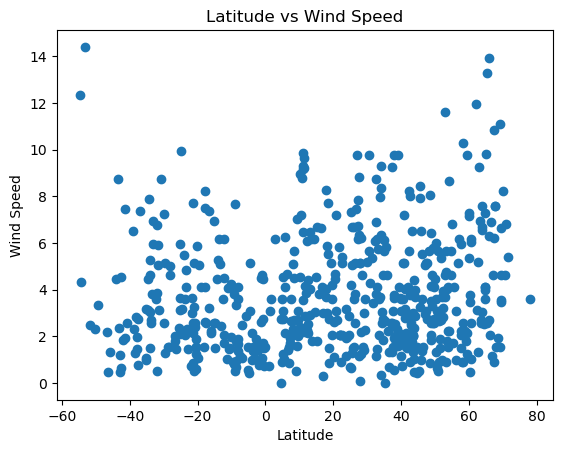

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def create_linear_regression_plots(data, x_vars, y_vars):
    for i, y_var in enumerate(y_vars):
        for j, x_var in enumerate(x_vars):
            x = data[x_var]
            y = data[y_var]

            slope, intercept = np.polyfit(x, y, 1)
            regression_line = slope * x + intercept

            plt.scatter(x, y)
            plt.plot(x, regression_line, color='red')
            plt.xlabel(x_var)
            plt.ylabel(y_var)
        plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,miramichi,47.0043,-65.4654,7.93,77,100,2.95,CA,1712874307
4,bethel,41.3712,-73.4140,15.27,88,100,1.54,US,1712874185
8,shingu,33.7333,135.9833,14.20,84,100,3.67,JP,1712874312
11,badger,64.8000,-147.5333,6.31,44,75,4.12,US,1712874166
12,olonkinbyen,70.9221,-8.7187,-8.43,88,100,6.79,SJ,1712874226


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] <0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,26.71,77,4,5.04,MU,1712873837
2,waitangi,-43.9535,-176.5597,17.68,93,100,4.47,NZ,1712873896
3,puerto ayora,-0.7393,-90.3518,28.98,97,48,4.47,EC,1712874310
5,bredasdorp,-34.5322,20.0403,13.91,71,3,4.45,ZA,1712873819
6,edinburgh of the seven seas,-37.0676,-12.3116,18.45,95,76,7.38,SH,1712873827


###  Temperature vs. Latitude Linear Regression Plot

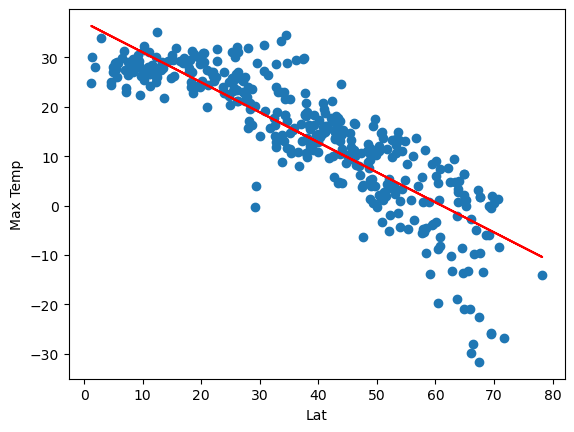

In [16]:
# Linear regression on Northern Hemisphere
create_linear_regression_plots(northern_hemi_df, ['Lat'], ['Max Temp'])


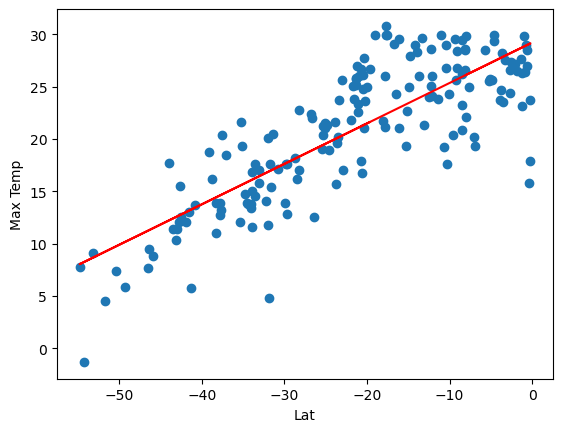

In [17]:
# Linear regression on Southern Hemisphere
create_linear_regression_plots(southern_hemi_df, ['Lat'], ['Max Temp'])

**Discussion about the linear relationship:** Temperatures are warmer near the equator or 0 latitude than the higher absolute values of latitudes moving north or south away from 0. Temperatures show a strong negative correlation in the northern hemisphere as we move into higher latitudes or toward the directional north pole. Temperatures show a strong positive correlation in southern hemisphere as we move toward 'higher' latitudes or toward the equator. 

### Humidity vs. Latitude Linear Regression Plot

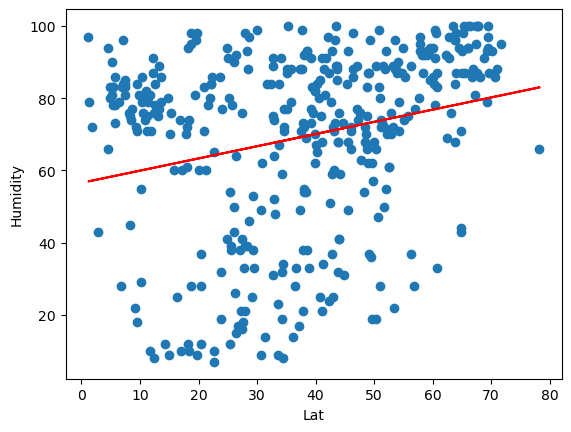

In [18]:
# Northern Hemisphere
create_linear_regression_plots(northern_hemi_df, ['Lat'], ['Humidity'])

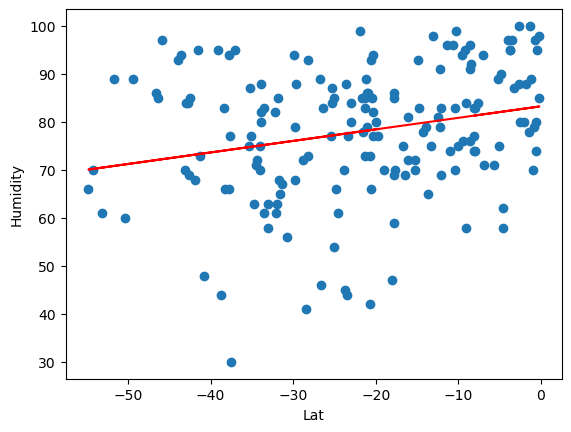

In [19]:
# Southern Hemisphere
create_linear_regression_plots(southern_hemi_df, ['Lat'], ['Humidity'])

**Discussion about the linear relationship:** There is an apparent positive correlation between latitudes and humidity. This correlation is much stronger in the northern hemisphere where we are observing a cluster of data points at higher latitudes with high humidities, without any lower humidities at high latitudes. Humidity in the southern hemisphere is more scattershot while still maintaining a slight positive correlation as we move closer to the equator, opposite of the trend we see in the northern hemisphere. This phenomenon is interesting, counter-intuitive, and the underlying reasons might be worth exploring. 

### Cloudiness vs. Latitude Linear Regression Plot

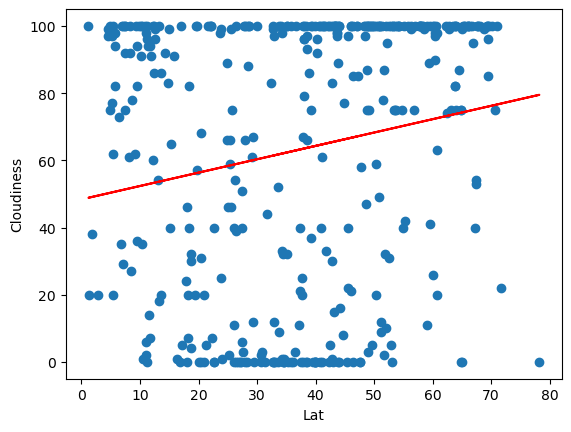

In [20]:
# Northern Hemisphere
create_linear_regression_plots(northern_hemi_df, ['Lat'], ['Cloudiness'])

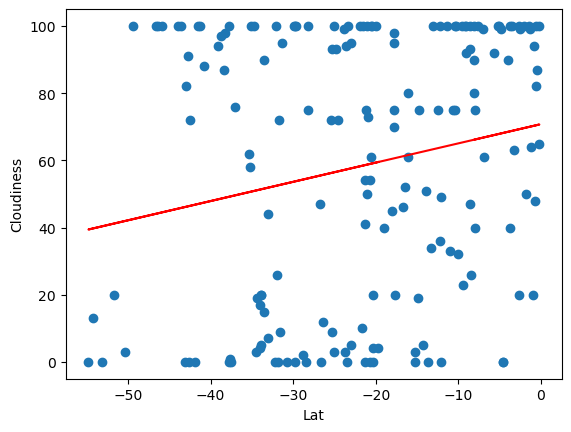

In [21]:
# Southern Hemisphere
create_linear_regression_plots(southern_hemi_df, ['Lat'], ['Cloudiness'])

**Discussion about the linear relationship:** We are obseving a slight positive linear regression between latitude and cloudiness in both hemispheres. Perhaps more cloudiness in the northern hemisphere as we move away from the equator in the northern hemisphere with the opposite being true in the southern hemisphere. It might be worth noting that this cloudiness relationship is similar to the humidity relationship in our previous plots. 

### Wind Speed vs. Latitude Linear Regression Plot

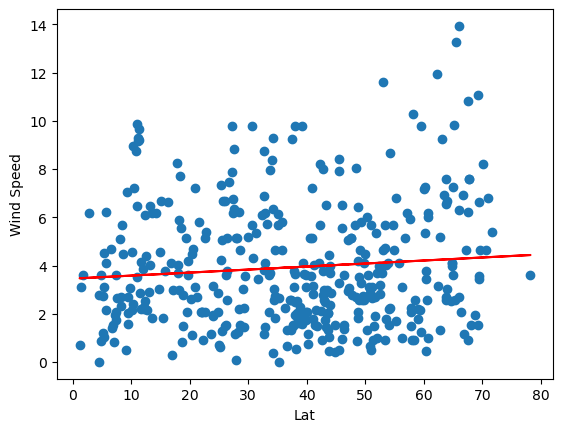

In [22]:
# Northern Hemisphere
create_linear_regression_plots(northern_hemi_df, ['Lat'], ['Wind Speed'])

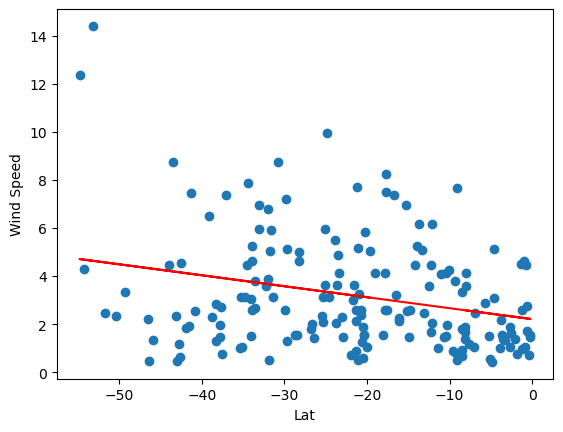

In [23]:
# Southern Hemisphere
create_linear_regression_plots(southern_hemi_df, ['Lat'], ['Wind Speed'])

**Discussion about the linear relationship:** We are observing very slight positive regression as we move further from the equator in both hemispheres. Although we do see most of our strongest wind speeds at latitudes furthest from the equator, particularly in the 60-70dg belt in the northern hemisphere, I would suggest there is no direct correlation between latitudes and wind speed for most locations. 